<a href="https://colab.research.google.com/github/Pythonimeislabor/repo1/blob/main/erstes_neuronales_Netz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz von kaggle herunterladen

In [1]:
%%writefile kaggle.json
{"username":"lutze3","key":"c1b954a36f5402b976973271cb154a2f"}

Writing kaggle.json


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

from IPython.display import clear_output
clear_output()

# imports

In [4]:
import cv2
import matplotlib.pyplot as plt

# Testweise ein Bild laden und anzeigen

In [ ]:
dateipfad = "dataset/5/5/0.png"
bild = cv2.imread(dateipfad, cv2.IMREAD_UNCHANGED) # bild lesen
plt.imshow(bild)

In [ ]:
bild_in_grau = bild[:,:,3]
print(bild_in_grau.shape)
plt.imshow(bild_in_grau, cmap="gray")

In [ ]:
bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
plt.imshow(bild_0_1, cmap = "gray")

# Alle Bilder und Beschriftungen in 2 Listen speichern

In [ ]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

import os

def lade_bild(pfad):
  bild = cv2.imread(pfad, cv2.IMREAD_UNCHANGED) # bild lesen
  bild_in_grau = bild[:,:,3]
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
  return bild_0_1


for zahl in range(10):
  pfad = "dataset/"+str(zahl)+"/"+str(zahl) + "/"
  print(pfad)
  alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
  for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
    pfad_zum_bild = pfad + name 
    bild = lade_bild(pfad_zum_bild)

    X.append(bild)
    Y.append(zahl)

Y ist  4


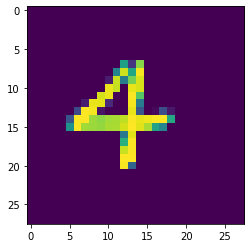

In [75]:
index = 50000

plt.imshow(X[index]), 
print("Y ist ", Y[index])

# Neuronales Netzwerk bauen

In [114]:
import tensorflow as tf

inputlayer = tf.keras.layers.Input(shape=(28,28))
platt_gemacht = tf.keras.layers.Flatten()(inputlayer)
dense1 = tf.keras.layers.Dense(16,activation="sigmoid")(platt_gemacht)
dense2 = tf.keras.layers.Dense(16,activation="sigmoid")(dense1)
output = tf.keras.layers.Dense(10,activation="softmax")(dense2)

model = tf.keras.Model(inputlayer, output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [115]:
import numpy as np

# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

p = np.random.permutation(Y.shape[0]) # X und Y gleichmäßig mischen
X = X[p]
Y = Y[p] 

In [116]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.SGD(0.001)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [117]:
model.fit(X, Y, batch_size = 32, epochs = 20, validation_split = 0.2) # Parameter optimieren

Epoch 1/20
2694/2694 [==============================] - 7s 3ms/step - loss: 2.3597 - accuracy: 0.0998 - val_loss: 2.3131 - val_accuracy: 0.0996
Epoch 2/20
2694/2694 [==============================] - 6s 2ms/step - loss: 2.3046 - accuracy: 0.0949 - val_loss: 2.3006 - val_accuracy: 0.1032
Epoch 3/20
2694/2694 [==============================] - 6s 2ms/step - loss: 2.2990 - accuracy: 0.1135 - val_loss: 2.2983 - val_accuracy: 0.1176
Epoch 4/20
2694/2694 [==============================] - 6s 2ms/step - loss: 2.2971 - accuracy: 0.1296 - val_loss: 2.2966 - val_accuracy: 0.1325
Epoch 5/20
2694/2694 [==============================] - 7s 2ms/step - loss: 2.2954 - accuracy: 0.1432 - val_loss: 2.2948 - val_accuracy: 0.1478
Epoch 6/20
2694/2694 [==============================] - 6s 2ms/step - loss: 2.2936 - accuracy: 0.1568 - val_loss: 2.2931 - val_accuracy: 0.1518
Epoch 7/20
2694/2694 [==============================] - 7s 2ms/step - loss: 2.2918 - accuracy: 0.1642 - val_loss: 2.2912 - val_accuracy:

In [96]:
verteilung = [0,0,0,0,0,0,0,0,0,0]
for i in Y:
  verteilung[i] += 1
verteilung

[10773, 10773, 10773, 10773, 10773, 10773, 10773, 10773, 10773, 10773]